In [1]:
"""
[Logistic Regression]
It's a classification model, not a regression.
Good at linear and binary classification (Able to use OvR for multiclass classification).

Odds ratio:
p : probability of positive event
Odds ratio = p / (1 - p)
Log-odds (logit) : logit(p) = log(p / (1 - p))
    logit(p(y = 1|X)) = transpose(W) * X

Logistic function:
    Inverse logit function : logistic function (sigmoid)
        => Predict probability of some sample is in some class
        o(z) = 1 / (1 + exp(-z)) = transpose(W) * X

Quantizer:
    y-hat = if o(z) >= 0.5 then 1 else 0
          = if z >= 0 then 1 else 0

Likelihood (L):
    We want maximum of L.
    L(W) = P(Y|X;W) = Product[from i = 1 to n](P(y(i)|x(i);W))
                    = Product[from i = 1 to n]{((o(z(i))) ^ y(i)) * ((1 - o(z(i))) ^ (1 - y(i)))
    If L is too small, then 'numerical undeflow' might happend. Also, sum of factors is more easy then
        product of factors.
    => So, we need log-likelihood function.
    log-likelihood function (l):
        l(W) = log(L(W)) = Sum[from i = 1 to n]{y(i) * log(o(z(i))) + (1 - y(i)) * log(1 - o(z(i)))}

Cost function (J):
    We want minimum of J.
    Cost of weight:
        J(W) = Sum[from i = 1 to n]{-log(o(z(i))) - (1 - y(i)) * log(1 - o(z(i)))}
    Cost of a single sample:
        J(o(z), y;W) = -y * log(o(z)) - (1 - y) * log(1 - o(z))
        => J(o(z), y;W) = if y = 1 then -log(o(z)) else if y = 0 then -log(1 - o(z))
"""
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Sigmoid
def sigmoid(z):
    """
    Sigmoid Function
    
    Parameters:
    z : list
        Input
    
    Returns:
    1 / (1 + exp(-z))
    """
    return 1.0 / (1.0 + np.exp(-z))

Plot sigmoid function...


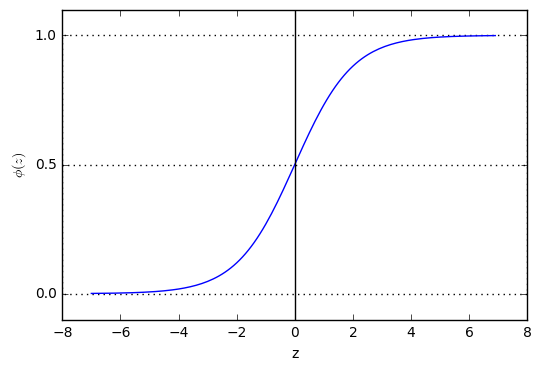

In [3]:
# Plot sigmoid
print('Plot sigmoid function...')
z = np.arange(-7, 7, 0.1)
phi_z = sigmoid(z)
plt.plot(z, phi_z)
plt.axvline(0.0, color='k')
plt.axhspan(0.0, 1.0, facecolor='1.0', alpha=1.0, ls='dotted')
plt.axhline(y=0.5, ls='dotted', color='k')
plt.yticks([0.0, 0.5, 1.0])
plt.ylim(-0.1, 1.1)
plt.xlabel('z')
plt.ylabel('$\phi (z)$')
plt.show()

In [4]:
# Cost function
def J(phi_z, y):
    if y == 1:
        return -(np.log(phi_z))
    elif y == 0:
        return -(np.log(1 - phi_z))
    else:
        raise ValueError("y must be 0 or 1")

Plot cost function...


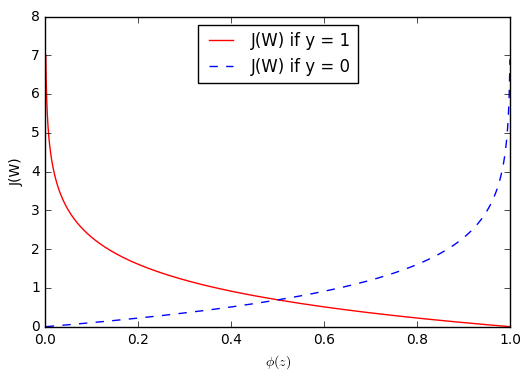

In [5]:
# Plot cost function
print('Plot cost function...')
cost_1 = J(phi_z, 1)
cost_0 = J(phi_z, 0)
line_cost_1 = plt.plot(phi_z, cost_1, 'r-', label='J(W) if y = 1')
line_cost_2 = plt.plot(phi_z, cost_0, 'b--', label='J(W) if y = 0')
plt.xlabel('$\phi (z)$')
plt.ylabel('J(W)')
plt.legend(loc='upper center')
plt.show()